<a href="https://colab.research.google.com/github/Luke-Chesley/Wiki-page-sentiment/blob/main/Sentiment_of_wikipedia_pages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [3]:
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=f0a3a7af8da7c92c09ddb7423207bcca9f60b7f3133f8c5c2809842188896d2b
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [34]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import wikipedia
import string
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt




import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')


plt.style.use('dark_background')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Scrape Wiki page, clean, and do sentiment analysis

In [33]:
def sentiment_of_wiki_page(title):
  wiki = wikipedia.page(title, auto_suggest=False)
  text = wiki.content
  word_tokens = word_tokenize(text)
  stops = stopwords.words('english')
  for n in string.punctuation:
    stops.append(n)


  additional_stops = ['==',"''","'s",'``','``','———','ISBN','===','Party','party', 'United','united']
  for stop in additional_stops:
    stops.append(stop)

  filtered_text = [w for w in word_tokens if not w.lower() in stops]
  sendf = pd.DataFrame(filtered_text,columns=['text'])
  sid = SentimentIntensityAnalyzer()
  sendf[['neg', 'neu', 'pos', 'compund']] = sendf['text'].apply(sid.polarity_scores).apply(pd.Series)
  sendf = sendf[sendf.compund != 0.0].drop_duplicates()
  sum_score = sendf['compund'].sum()
  mean_score = sendf['compund'].mean()
  median_score = sendf['compund'].median()


  # return f"sum score = {round(sum_score, 3)}, mean score = {round(mean_score,3)}, median score = {round(median_score,3)}"
  return sum_score, mean_score, median_score
  # return sendf

# Sentiment analysis of all presidential candidates

In [6]:
list_of_candidates = ['Joe Biden',
                      'Robert F. Kennedy Jr.',
                      'Marianne Williamson',
                      'Doug Burgum',
                      'Chris Christie',
                      'Ron DeSantis',
                      'Larry Elder',
                      'Nikki Haley',
                      "Asa Hutchinson",
                      'Mike Pence',
                      'Vivek Ramaswamy',
                      'Tim Scott',
                      'Corey Stapleton',
                      'Francis X. Suarez',
                      'Donald Trump']

In [7]:
df_pagesen = pd.DataFrame(columns=['Candidate','sum_score','mean_score','median_score'])
for candidate in list_of_candidates:
  raw_results = sentiment_of_wiki_page(candidate)

  sum_score = raw_results[0]
  mean_score = raw_results[1]
  median_score = raw_results[2]

  new_row = {"Candidate":candidate, 'sum_score':sum_score, 'mean_score':mean_score, 'median_score':median_score}
  new_row = pd.DataFrame.from_dict(new_row,orient='index').T

  df_pagesen = pd.concat([df_pagesen,new_row])

df_pagesen['party'] = [1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]

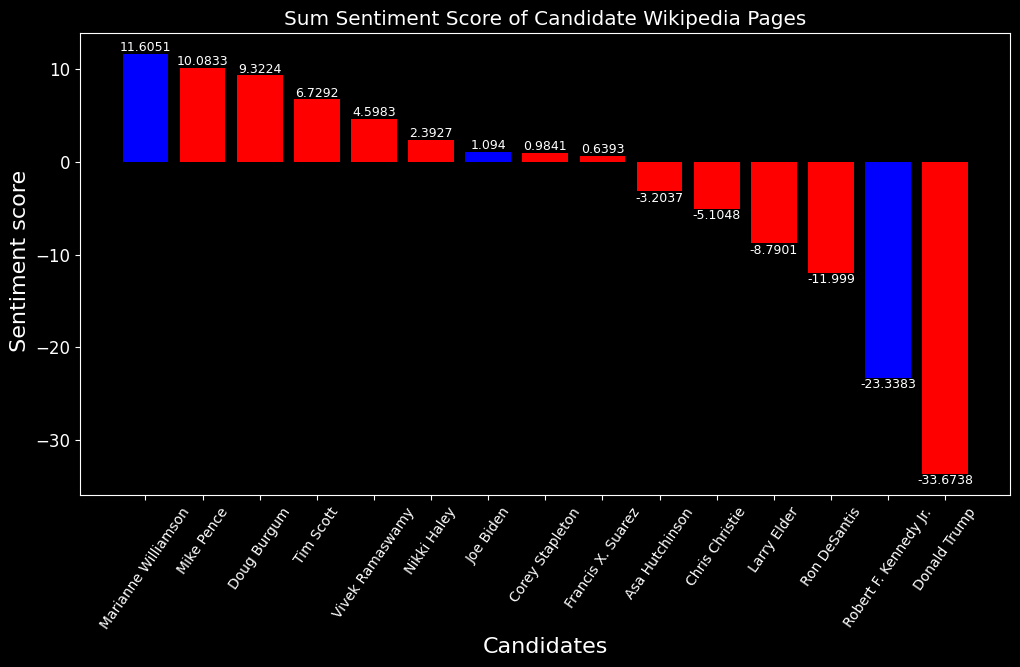

In [36]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)


sum_colors = ["red" if i != 1 else "blue" for i in df_pagesen.sort_values(by='sum_score',ascending=False)['party']]


p1 = ax.bar(x = df_pagesen.sort_values(by='sum_score',ascending=False)['Candidate'],
        height = df_pagesen.sort_values(by='sum_score',ascending=False)['sum_score'],
            data = df_pagesen, color=sum_colors)

ax.set_ylabel(' Sentiment score')
ax.set_xlabel('Candidates')
ax.set_title('Sum Sentiment Score of Candidate Wikipedia Pages')
ax.bar_label(p1,label_type='edge',fontsize=9)






plt.xticks(fontsize=10,rotation=55)


plt.show()

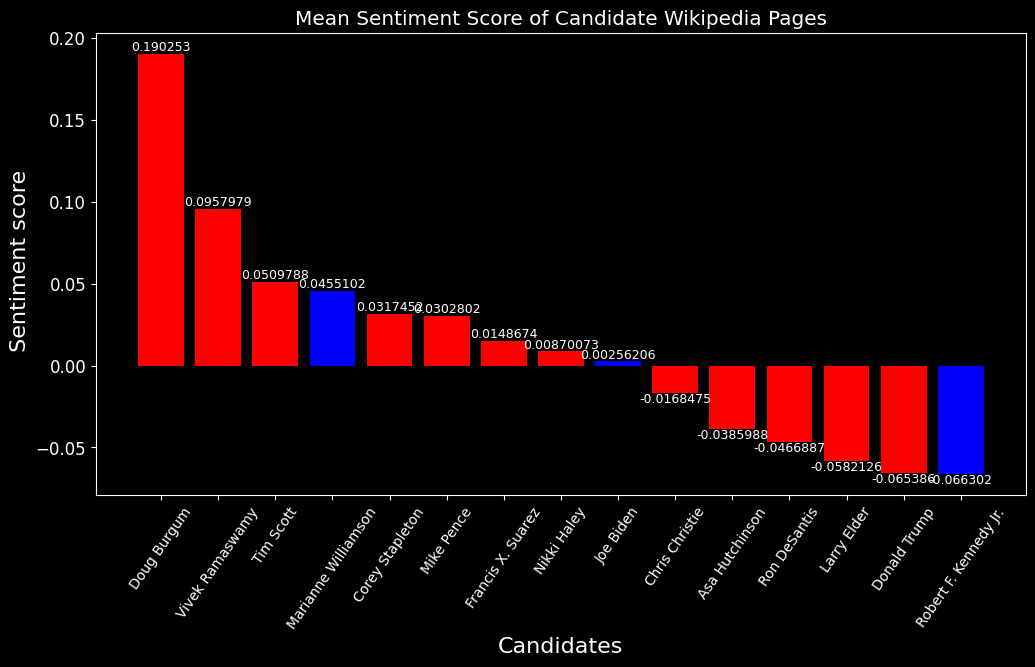

In [37]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)


mean_colors = ["red" if i != 1 else "blue" for i in df_pagesen.sort_values(by='mean_score',ascending=False)['party']]


p1 = ax.bar(x = df_pagesen.sort_values(by='mean_score',ascending=False)['Candidate'],
        height = df_pagesen.sort_values(by='mean_score',ascending=False)['mean_score'],
            data = df_pagesen, color=mean_colors)

ax.set_ylabel(' Sentiment score')
ax.set_xlabel('Candidates')
ax.set_title('Mean Sentiment Score of Candidate Wikipedia Pages')
ax.bar_label(p1,label_type='edge',fontsize=9)






plt.xticks(fontsize=10,rotation=55)


plt.show()

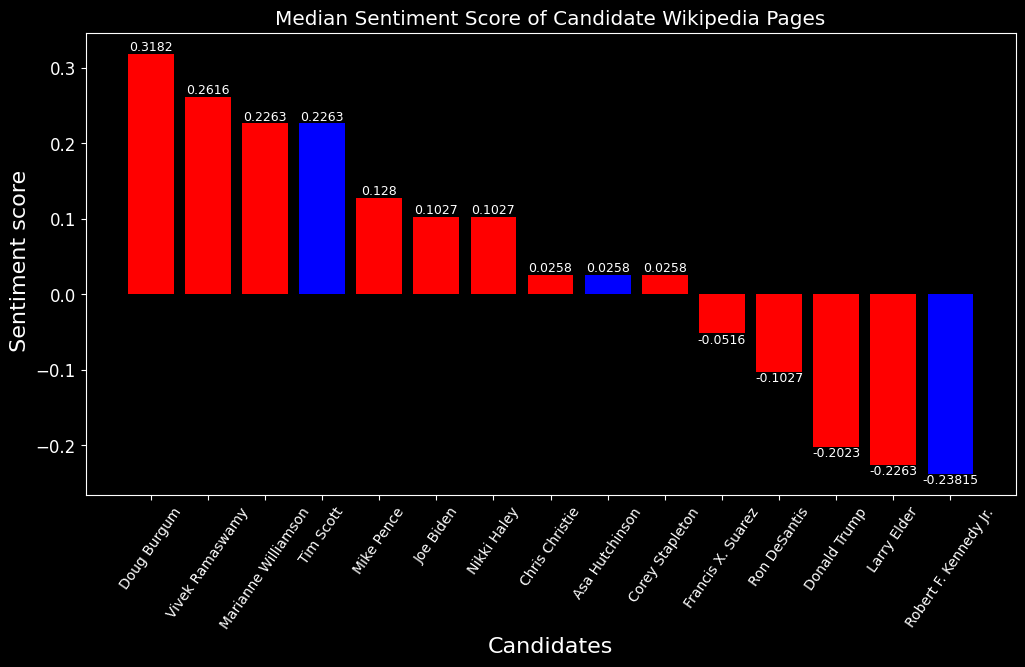

In [38]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)


median_colors = ["red" if i != 1 else "blue" for i in df_pagesen.sort_values(by='median_score',ascending=False)['party']]


p1 = ax.bar(x = df_pagesen.sort_values(by='median_score',ascending=False)['Candidate'],
        height = df_pagesen.sort_values(by='median_score',ascending=False)['median_score'],
            data = df_pagesen, color=mean_colors)

ax.set_ylabel(' Sentiment score')
ax.set_xlabel('Candidates')
ax.set_title('Median Sentiment Score of Candidate Wikipedia Pages')
ax.bar_label(p1,label_type='edge',fontsize=9)






plt.xticks(fontsize=10,rotation=55)


plt.show()